In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Membaca dataset dari file CSV
df = pd.read_csv('Dataaset Kurs JYP1.csv')

In [ ]:

# Tampilkan nama-nama kolom dalam DataFrame
print(df.columns)

# Tampilkan beberapa baris pertama dari DataFrame untuk memeriksa data
print(df.head())

# Tampilkan statistik deskriptif untuk memeriksa outlier
print(df.describe())

Index(['suku_bunga_acuan', 'inflasi', 'kurs_jual', 'kurs_beli', 'tanggal'], dtype='object')
  suku_bunga_acuan inflasi  kurs_jual  kurs_beli   tanggal
0            5.00%   2.68%   12852.72   12721.32  1/2/2020
1            5.00%   2.68%   12925.42   12793.26  1/3/2020
2            5.00%   2.68%   12989.09   12856.27  1/6/2020
3            5.00%   2.68%   12899.85   12767.96  1/7/2020
4            5.00%   2.68%   12947.18   12817.17  1/8/2020
          kurs_jual     kurs_beli
count    990.000000    990.000000
mean   12311.263980  12186.463939
std     1285.592534   1272.335375
min    10342.880000  10237.930000
25%    11023.305000  10911.512500
50%    12526.610000  12398.525000
75%    13354.965000  13218.377500
max    15668.380000  15508.150000


In [ ]:
# Mengganti tanda persen (%) dan mengubah tipe data menjadi float
df['inflasi'] = df['inflasi'].str.replace('%', '').astype(float)

# Tampilkan beberapa baris pertama dari DataFrame untuk memeriksa data
print(df.head())


  suku_bunga_acuan  inflasi  kurs_jual  kurs_beli   tanggal
0            5.00%     2.68   12852.72   12721.32  1/2/2020
1            5.00%     2.68   12925.42   12793.26  1/3/2020
2            5.00%     2.68   12989.09   12856.27  1/6/2020
3            5.00%     2.68   12899.85   12767.96  1/7/2020
4            5.00%     2.68   12947.18   12817.17  1/8/2020


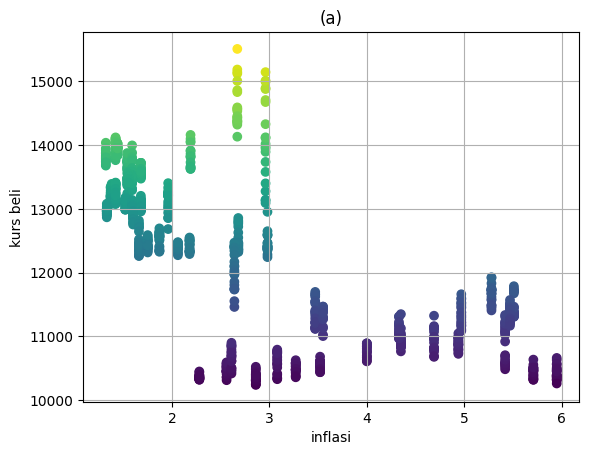

In [ ]:
# Plot Kurs Beli vs Inflasi
#plt.figure(figsize=(10, 6))
plt.scatter(df['inflasi'], df['kurs_beli'], c=df['kurs_beli'], cmap='viridis')
#plt.colorbar(label='kurs_beli')
plt.title('(a)')
plt.xlabel('inflasi')
plt.ylabel('kurs beli')
plt.grid(True)
plt.show()

In [ ]:
# Mengganti tanda persen (%) dan mengubah tipe data menjadi float
df['suku_bunga_acuan'] = df['suku_bunga_acuan'].str.replace('%', '').astype(float)

# Tampilkan beberapa baris pertama dari DataFrame untuk memeriksa data
print(df.head())


   suku_bunga_acuan  inflasi  kurs_jual  kurs_beli   tanggal
0               5.0     2.68   12852.72   12721.32  1/2/2020
1               5.0     2.68   12925.42   12793.26  1/3/2020
2               5.0     2.68   12989.09   12856.27  1/6/2020
3               5.0     2.68   12899.85   12767.96  1/7/2020
4               5.0     2.68   12947.18   12817.17  1/8/2020


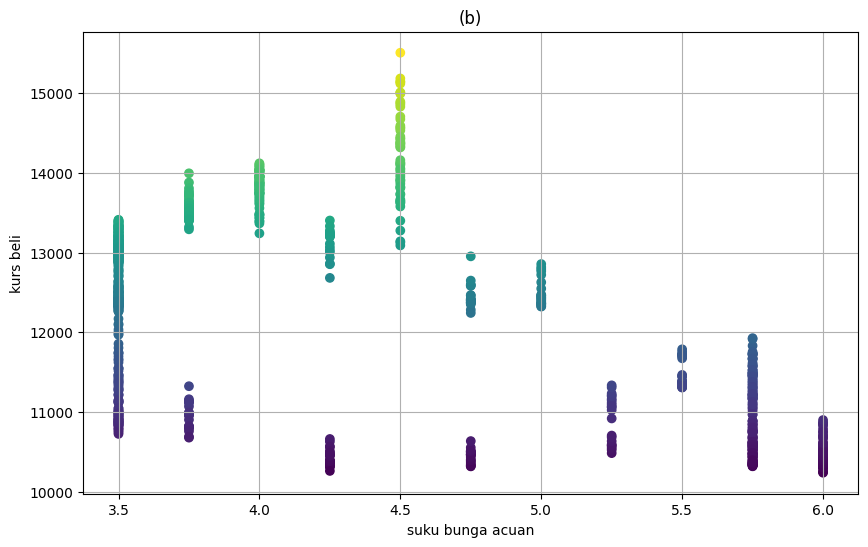

In [ ]:
# Plot Kurs Beli vs Inflasi
plt.figure(figsize=(10, 6))
plt.scatter(df['suku_bunga_acuan'], df['kurs_beli'], c=df['kurs_beli'], cmap='viridis')
#plt.colorbar(label='kurs_beli')
plt.title('(b)')
plt.xlabel('suku bunga acuan')
plt.ylabel('kurs beli')
plt.grid(True)
plt.show()

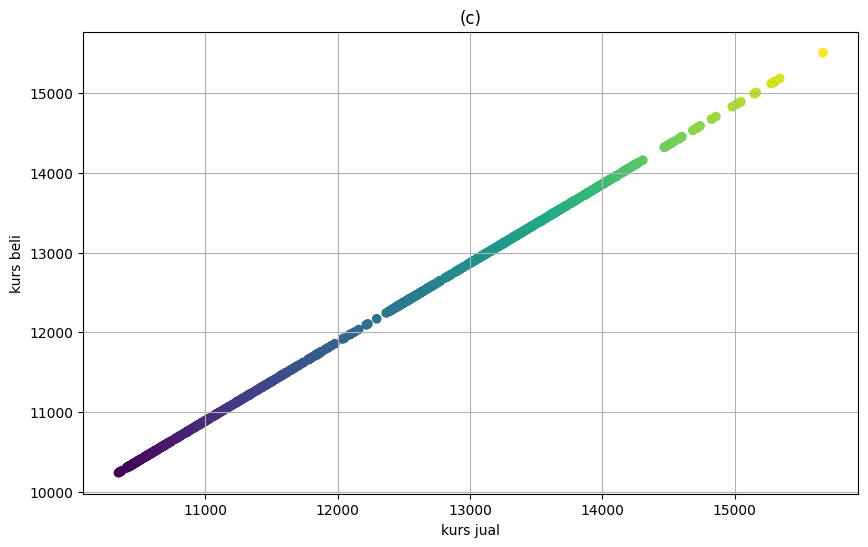

In [ ]:
# Plot Kurs Beli vs Inflasi
plt.figure(figsize=(10, 6))
plt.scatter(df['kurs_jual'], df['kurs_beli'], c=df['kurs_beli'], cmap='viridis')
#plt.colorbar(label='kurs_beli')
plt.title('(c)')
plt.xlabel('kurs jual')
plt.ylabel('kurs beli')
plt.grid(True)
plt.show()

In [ ]:
# Pilih hanya kolom numerik untuk perhitungan korelasi
numeric_df = df.select_dtypes(include=[float, int])

# Hitung matriks korelasi
correlation_matrix = numeric_df.corr()

# Tampilkan matriks korelasi
print(correlation_matrix)


                  suku_bunga_acuan   inflasi  kurs_jual  kurs_beli
suku_bunga_acuan          1.000000  0.497225  -0.575527  -0.575543
inflasi                   0.497225  1.000000  -0.690172  -0.690198
kurs_jual                -0.575527 -0.690172   1.000000   1.000000
kurs_beli                -0.575543 -0.690198   1.000000   1.000000


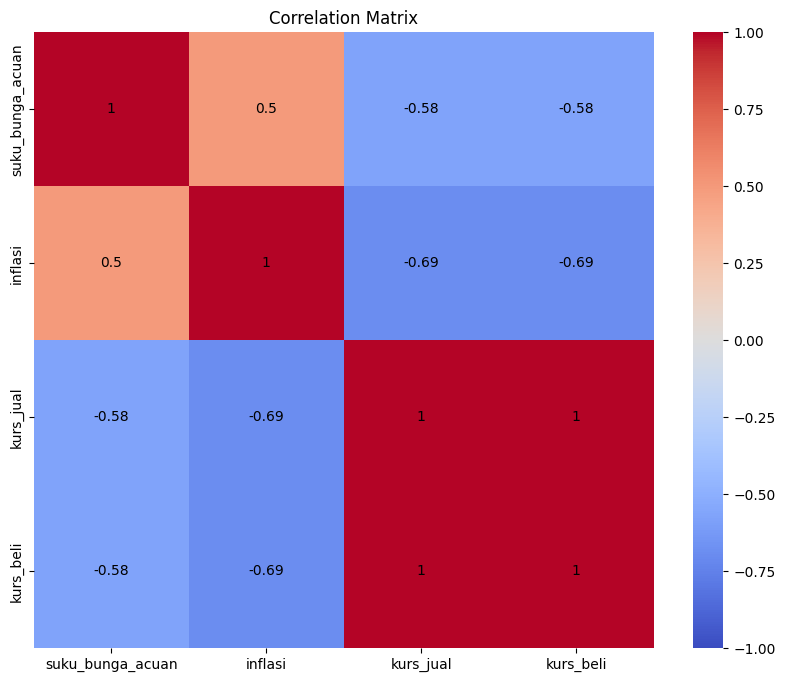

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi matriks korelasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={'color': 'black'})
plt.title('Correlation Matrix')
plt.show()


In [ ]:
!pip install pyGRNN
from sklearn.model_selection import train_test_split, KFold
from pyGRNN import GRNN
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [ ]:

# Tampilkan beberapa baris pertama dari DataFrame untuk memeriksa data
print(df.head())


   suku_bunga_acuan  inflasi  kurs_jual  kurs_beli   tanggal
0               5.0     2.68   12852.72   12721.32  1/2/2020
1               5.0     2.68   12925.42   12793.26  1/3/2020
2               5.0     2.68   12989.09   12856.27  1/6/2020
3               5.0     2.68   12899.85   12767.96  1/7/2020
4               5.0     2.68   12947.18   12817.17  1/8/2020


In [ ]:
# Normalisasi data menggunakan MinMaxScaler
scaler = MinMaxScaler()
df[['suku_bunga_acuan', 'inflasi', 'kurs_beli', 'kurs_jual']] = scaler.fit_transform(df[['suku_bunga_acuan', 'inflasi', 'kurs_beli', 'kurs_jual']])

In [ ]:
# Mengubah data menjadi bentuk sequence
def create_sequences(data, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(data):
            break
        seq_x, seq_y = data[i:end_ix, :-1], data[end_ix:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
# Mengatur jumlah timestep untuk input dan output
n_steps_in, n_steps_out = 3, 1

In [ ]:
# Mengubah dataset menjadi sequence
data = df[['suku_bunga_acuan', 'inflasi', 'kurs_beli', 'kurs_jual']].values
X, y = create_sequences(data, n_steps_in, n_steps_out)

In [ ]:
# Menampilkan hasil data sequence
for i in range(len(X)):
    print(f"Data Sequence {i+1}:")
    for j in range(n_steps_in):
        print(f"  t-{n_steps_in-j}: {X[i][j]}")
    print(f"Output: {y[i]}")
    print()

Output streaming akan dipotong hingga 5000 baris terakhir.
Output: [0.66553751]

Data Sequence 155:
  t-3: [0.2        0.         0.70442031]
  t-2: [0.2       0.        0.6980904]
  t-1: [0.2        0.         0.66572173]
Output: [0.65277251]

Data Sequence 156:
  t-3: [0.2       0.        0.6980904]
  t-2: [0.2        0.         0.66572173]
  t-1: [0.2        0.         0.65271089]
Output: [0.67693738]

Data Sequence 157:
  t-3: [0.2        0.         0.66572173]
  t-2: [0.2        0.         0.65271089]
  t-1: [0.2       0.        0.6773702]
Output: [0.65568867]

Data Sequence 158:
  t-3: [0.2        0.         0.65271089]
  t-2: [0.2       0.        0.6773702]
  t-1: [0.2        0.         0.65562918]
Output: [0.66270773]

Data Sequence 159:
  t-3: [0.2       0.        0.6773702]
  t-2: [0.2        0.         0.65562918]
  t-1: [0.2        0.         0.66264027]
Output: [0.66892123]

Data Sequence 160:
  t-3: [0.2        0.         0.65562918]
  t-2: [0.2        0.         0.662640